In [3]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile
from speaker_recogonizer import mfcc, vq

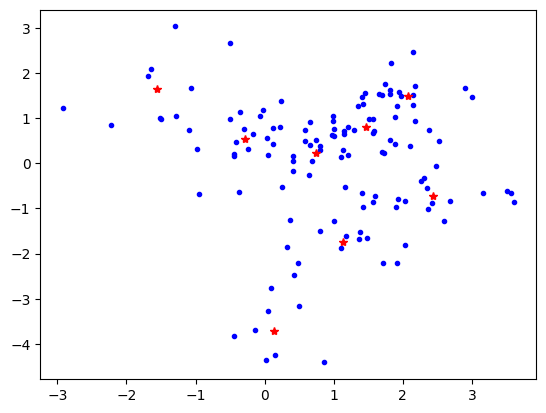

In [4]:
audio_path = r'D:\Code\python\mssb\python_version\speaker\data\train\s1.wav'
audio, fs = soundfile.read(audio_path)
mfccs = mfcc(audio, fs, 256, 100, 20)
d = mfccs[5:7,:]
plt.plot(d[0,:], d[1,:], 'b.')
r = vq(d, 16)
plt.plot(r[0,:], r[1,:], 'r*')

In [5]:
e, k = 1e-2, 16
# init codebook with centroids of d
r = np.mean(d, axis=1).reshape(-1,1)
for i in range(1,int(np.log2(k))):
    # split each centroid into two
    r = np.hstack((r*(1-e), r*(1+e)))
    dpr = 1e5

    while True:
        # calculate each point's distance to each centroid
        z = np.concatenate([np.linalg.norm(d-r[:,j].reshape(-1,1),axis=0).reshape(1,-1) for j in range(r.shape[1])], axis=0)
        ind = np.argmin(z, axis=0)
        t = 0
        for j in range(2**i):
            # update centroids
            r[:,j] = np.mean(d[:,ind==j], axis=1)
            dists = np.linalg.norm(d[:,ind==j]-r[:,j].reshape(-1,1), axis=0)
            t += sum(dists)

        # check if the centroids are stable
        if (dpr - t)/t < e:
            break
        else:
            dpr = t

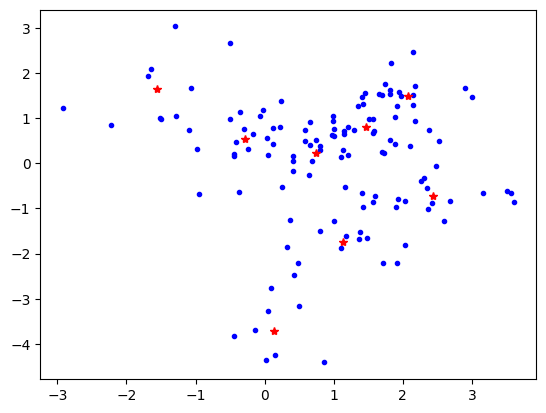

In [6]:
plt.plot(d[0,:], d[1,:], 'b.')
plt.plot(r[0,:], r[1,:], 'r*')